# Loading and Accessing SnowModel Output

Snow cover data for the Sunlight Under Sea Ice project are generated by SnowModel-LG [(Liston et al)]().  This model output includes snow depth and density, which can be downloaded from [Here](ftp://ftp.cira.colostate.edu/ftp/Liston/SnowModel_LG_1980-2018/Data/).  Fields are in the NSIDC North Polar Stereographic projection on the X grid.

Output from SnowModel-LG are stored in [GrADS](http://cola.gmu.edu/grads/grads.php) format.  GrADS is a complete analysis system.  All we want here is to read the files, and then perform analysis using the GeoScientific Python ecosystem. So I have written a simple GrADS reader that loads data into an `xarray.DataArray`.

GrADS data requires two files: a flat binary file (often with a `.gdat` extension) and a control file (`.ctl`).  The control file contains information about the dimensions and coordinates of the `.gdat` file, as well as information about the variables contained within that file.  `read_grads` expects `.ctl` and `.gdat` files to have the same basename and be in the same directory.  If they do not, the `.ctl` needs to be passed to `read_grads` as a keyword argument.

As a first step, we import python modules.

In [4]:
import os
import sys

sys.path.append("../sunlight")  # Add `sunlight` to $PYTHONPATH

from read_grads import read_grads

Set the path to the data.  As an example, I'm reading the snow depth fields.

In [11]:
DATAPATH = os.path.join(os.path.sep, "home", "apbarret", "Data", "Snow_on_seaice", "SnowModelOutput")
datafile = os.path.join(DATAPATH, "snod.gdat")
ctlfile = os.path.join(DATAPATH, "SM_snod_era5_01Aug1980-31Jul2018.ctl")

Load data into an xarray object.  These are large files, so you may run into some memory issues.  I plan to add `dask` capabilities to `read_grads` to help with these out-of-memory conditions.

In [14]:
snod = read_grads(datafile, ctlfile=ctlfile)
snod

<xarray.DataArray (time: 13879, x: 361, y: 361, z: 1)>
array([[[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        ...,

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]],


       [[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        ...,

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]],


       [[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        ...,

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]],


       ...,


       [[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        ...,

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]],


       [[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        ...,

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]],


       [[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        ...,

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan

By default, `read_grads` returns a 4D data-cube.  In this case, the `z` dimension of `snod` is `size=1`.  This really doesn't matter but the `z` dimension can be dropped by calling the `squeeze` method. 

In [15]:
snod = snod.squeeze()
snod

<xarray.DataArray (time: 13879, x: 361, y: 361)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-08-01 1980-08-02 ... 2018-07-31
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0 361.0
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0 361.0
    z        float64 1.0

Right now, this is a very _bare bones_ `DataArray`.  Variables and coordinates do not have attributes.  Adding attributes is on the TBD list.  The x and y coordinates are also just row and column indices, not projected coordinates.

`xarray` has a number of methods to select individual cells or slices of cells.  More details can be found [here](http://xarray.pydata.org/en/stable/indexing.html).  I'll provide a few examples here.

The simplest approach is to access values by coordinate indices, where indices for `time`, `x` and `y` are 0 to 13878, 0 to 360 and 0 to 360 respectively.

In [17]:
snod[0, 180, 180]

<xarray.DataArray ()>
array(0.00099671, dtype=float32)
Coordinates:
    time     datetime64[ns] 1980-08-01
    x        float64 181.0
    y        float64 181.0
    z        float64 1.0

This returns 0.00099 for the cell with coordinates `(1980-08-01, 181, 181)`.  Note xarray indices are _zero-indexed_ but the array coordinates start at 1.

The above method is is a quick way to access data but is not the best way.  `xarray.DataArray` has `.loc`, `.sel` and `.isel` methods.  These are the preferred methods.  The `.loc` method allows coordinate values to be used. 

In [19]:
snod.loc["1980-08-01", 181, 181]

<xarray.DataArray ()>
array(0.00099671, dtype=float32)
Coordinates:
    time     datetime64[ns] 1980-08-01
    x        float64 181.0
    y        float64 181.0
    z        float64 1.0

`sel` uses named coordinates, which is easier to read.  

In [21]:
snod.sel(time="1980-08-01", x=181, y=181)

<xarray.DataArray ()>
array(0.00099671, dtype=float32)
Coordinates:
    time     datetime64[ns] 1980-08-01
    x        float64 181.0
    y        float64 181.0
    z        float64 1.0

In [22]:
snod.sel(x=181, time="1980-08-01", y=181)

<xarray.DataArray ()>
array(0.00099671, dtype=float32)
Coordinates:
    time     datetime64[ns] 1980-08-01
    x        float64 181.0
    y        float64 181.0
    z        float64 1.0

Also works.

In [25]:
snod.isel(time=0)

<xarray.DataArray (x: 361, y: 361)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 1980-08-01
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0 361.0
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0 361.0
    z        float64 1.0

`.sel` also allows selections along the time dimension by year and month, as well as by slices.

To access all data for a the year 2000

In [26]:
snod.sel(time="2000")

<xarray.DataArray (time: 366, x: 361, y: 361)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0 361.0
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0 361.0
    z        float64 1.0

To get all data for April 2000 you can pass 2000-04 to sel.  Note that the "-" is important, 200004 will not work.

In [28]:
snod.sel(time="2000-04")

<xarray.DataArray (time: 30, x: 361, y: 361)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-04-01 2000-04-02 ... 2000-04-30
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0 361.0
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0 361.0
    z        float64 1.0

Use `slice()` to get a time slice of data for a given period.  To get the accumulation and melt season for the 1999-08-01 to 2000-07-31 period use

In [29]:
snod.sel(time=slice("19990801", "20000731"))

<xarray.DataArray (time: 366, x: 361, y: 361)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1999-08-01 1999-08-02 ... 2000-07-31
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0 361.0
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0 361.0
    z        float64 1.0

Likewise to get slices of x and y coordinates

In [30]:
snod.sel(x=slice(170,190), y=slice(160,180))

<xarray.DataArray (time: 13879, x: 21, y: 21)>
array([[[1.98085399e-05, 2.79908527e-05, 2.48382166e-05, ...,
         1.90773586e-04, 2.34123305e-04, 2.63370806e-04],
        [2.31827071e-05, 4.12370646e-05, 6.27888876e-05, ...,
         4.22978599e-04, 4.09354747e-04, 3.88532440e-04],
        [5.45676558e-05, 4.43816789e-05, 8.74672405e-05, ...,
         4.94022621e-04, 4.60625277e-04, 4.32714151e-04],
        ...,
        [3.61470127e-04, 3.72910348e-04, 3.54850548e-04, ...,
         5.88800933e-04, 2.14060972e-04, 2.96379498e-04],
        [2.88689160e-04, 3.12286284e-04, 3.08785180e-04, ...,
         2.87001283e-04, 1.71361055e-04, 2.45729520e-04],
        [2.36434309e-04, 2.25390235e-04, 2.43375689e-04, ...,
         2.10081256e-04, 1.14867995e-04, 2.73963175e-04]],

       [[1.45305705e-06, 9.05132674e-06, 1.03134589e-05, ...,
         1.72575077e-04, 1.31943627e-04, 1.18063290e-04],
        [1.17494744e-06, 6.08332130e-06, 5.78444315e-06, ...,
         3.40854691e-04, 2.53546226e-04, 1.78642091e-04],
        [2.32323964e-06, 3.75186960e-06, 2.87583157e-06, ...,
         5.04991622e-04, 4.05154686e-04, 3.05877387e-04],
        ...,
        [5.12761821e-04, 8.27902462e-04, 1.24211202e-03, ...,
         3.12687177e-03, 3.34412861e-03, 4.22952650e-03],
        [7.12909503e-04, 1.09528855e-03, 1.47545047e-03, ...,
         3.25313141e-03, 3.59031954e-03, 4.36703488e-03],
        [9.53995681e-04, 1.10159384e-03, 2.55569536e-03, ...,
         3.36517580e-03, 4.21444140e-03, 4.85996064e-03]],

       [[6.64389299e-05, 1.10845394e-04, 1.03481449e-04, ...,
         1.35332393e-03, 1.47590053e-03, 1.56107650e-03],
        [8.68639254e-05, 1.39915239e-04, 1.60711832e-04, ...,
         7.93670653e-04, 8.46620125e-04, 9.35832039e-04],
        [1.78719230e-04, 1.75712194e-04, 1.97437723e-04, ...,
         3.39632388e-04, 3.53499840e-04, 4.01946774e-04],
        ...,
        [8.40762150e-05, 7.34600253e-05, 5.50696423e-05, ...,
         5.52385987e-04, 6.56248245e-04, 8.48988653e-04],
        [9.67973683e-05, 7.21736578e-05, 4.81077186e-05, ...,
         5.56364714e-04, 7.05707527e-04, 9.16910532e-04],
        [7.03622136e-05, 6.10988354e-05, 8.62460729e-05, ...,
         5.91053278e-04, 7.66182726e-04, 9.65828600e-04]],

       ...,

       [[1.36469680e-04, 1.03285609e-04, 1.49738771e-04, ...,
         1.91312603e-04, 1.71412961e-04, 1.66913989e-04],
        [1.60227137e-04, 1.35809838e-04, 2.78237450e-04, ...,
         3.58243968e-04, 3.45387729e-04, 3.69224930e-04],
        [2.46157171e-04, 1.31380337e-04, 2.24314339e-04, ...,
         4.58885770e-04, 6.53116091e-04, 6.55608135e-04],
        ...,
        [2.69798853e-04, 1.38516712e-04, 9.86905288e-05, ...,
         1.36608968e-03, 1.05867651e-03, 1.11346459e-03],
        [1.94155975e-04, 1.55208021e-04, 1.23823425e-04, ...,
         1.29043392e-03, 1.10021781e-03, 8.74490244e-04],
        [2.39474422e-04, 1.80810952e-04, 1.15605682e-04, ...,
         1.12527376e-03, 9.96842515e-04, 9.54963733e-04]],

       [[6.47700872e-05, 5.98911647e-05, 8.91560994e-05, ...,
         2.59079592e-04, 2.20163725e-04, 1.98812777e-04],
        [1.70975545e-04, 1.39482916e-04, 2.45635340e-04, ...,
         2.70754943e-04, 1.98036723e-04, 1.72583867e-04],
        [4.22936777e-04, 2.61719164e-04, 4.03531652e-04, ...,
         2.75310129e-04, 2.48340482e-04, 2.07429039e-04],
        ...,
        [2.20020721e-03, 2.37142085e-03, 2.68078037e-03, ...,
         2.69138138e-03, 2.22421414e-03, 3.26120341e-03],
        [2.93304166e-03, 3.62314610e-03, 3.17773735e-03, ...,
         2.21825531e-03, 2.11891881e-03, 2.19460321e-03],
        [4.05093934e-03, 3.62148718e-03, 3.45394621e-03, ...,
         1.85856025e-03, 1.83367357e-03, 1.78047025e-03]],

       [[1.02485001e-06, 0.00000000e+00, 0.00000000e+00, ...,
         2.38753655e-05, 1.68894603e-05, 1.75528639e-05],
        [4.16626153e-06, 1.36787969e-06, 1.08145264e-06, ...,
         3.05504509e-05, 3.02136814e-05, 3.63976324e-05],
        [1.54198133e-05, 

Values can be aggregated as means or standard deviations.  Generating a time series of mean snow depth for the region selected above for 1999-08-01 to 2000-07-31 is done as follows

In [33]:
ts = snod.sel(time=slice("19990801", "20000731"), x=slice(170,190), y=slice(160,180)).mean(dim=['x','y'])
ts

<xarray.DataArray (time: 366)>
array([3.51423951e-04, 2.65855895e-04, 1.14432885e-03, 2.11020489e-03,
       8.78693711e-04, 4.55390778e-04, 2.58164422e-04, 4.89028404e-04,
       1.79968862e-04, 4.61130665e-04, 3.57580284e-04, 2.50061363e-04,
       1.08253771e-04, 3.24250286e-05, 2.93121935e-04, 3.89625144e-04,
       3.58983903e-04, 5.71763434e-04, 3.52033821e-04, 3.17813072e-04,
       4.20774752e-03, 9.24974121e-03, 2.77723931e-02, 2.59181727e-02,
       2.61039548e-02, 2.90077236e-02, 3.00851874e-02, 3.06021385e-02,
       3.22107896e-02, 3.34722921e-02, 4.08715010e-02, 4.41312157e-02,
       4.43054587e-02, 4.37057465e-02, 4.07506302e-02, 3.91883478e-02,
       3.99887636e-02, 4.13978025e-02, 4.12194915e-02, 5.06298207e-02,
       6.04547150e-02, 6.07309006e-02, 7.24429712e-02, 7.74100795e-02,
       8.04394260e-02, 8.79236162e-02, 8.77664164e-02, 8.69799182e-02,
       8.65867063e-02, 8.32343921e-02, 9.08626094e-02, 1.00533456e-01,
       1.04684658e-01, 1.04675934e-01, 1.05106898e-01, 1.05698235e-01,
       1.06086306e-01, 1.04689762e-01, 1.03053413e-01, 1.02095388e-01,
       9.68862101e-02, 9.53286067e-02, 9.87535864e-02, 1.11611627e-01,
       1.10381216e-01, 1.10152662e-01, 1.15351722e-01, 1.24718219e-01,
       1.29120633e-01, 1.32712036e-01, 1.32485449e-01, 1.28726125e-01,
       1.29333958e-01, 1.33156240e-01, 1.37443274e-01, 1.42125204e-01,
       1.36759356e-01, 1.30660892e-01, 1.29258037e-01, 1.25841901e-01,
       1.27158150e-01, 1.26754791e-01, 1.26154214e-01, 1.30795673e-01,
       1.36580914e-01, 1.42431483e-01, 1.44779608e-01, 1.46395445e-01,
       1.49951011e-01, 1.51851490e-01, 1.48208588e-01, 1.44218981e-01,
       1.43591523e-01, 1.48866788e-01, 1.48794502e-01, 1.49179712e-01,
       1.56124026e-01, 1.58316717e-01, 1.59439921e-01, 1.64904878e-01,
       1.74021214e-01, 1.80925488e-01, 1.91955134e-01, 1.94776088e-01,
       1.97271436e-01, 1.89776763e-01, 1.83695227e-01, 1.86328292e-01,
       1.84125632e-01, 1.81100622e-01, 1.81108043e-01, 1.80267751e-01,
       1.77131236e-01, 1.77101105e-01, 1.81558460e-01, 1.86357915e-01,
       1.88466489e-01, 1.89525753e-01, 1.91374913e-01, 1.93064585e-01,
       1.95859492e-01, 1.96662366e-01, 1.98448151e-01, 2.02925235e-01,
       2.04965860e-01, 2.09140792e-01, 2.15447426e-01, 2.20011979e-01,
       2.22741678e-01, 2.24063098e-01, 2.30993658e-01, 2.33864397e-01,
       2.33005941e-01, 2.26904973e-01, 2.30117008e-01, 2.31111109e-01,
       2.30432257e-01, 2.26149932e-01, 2.23037928e-01, 2.21345201e-01,
       2.18768165e-01, 2.20053256e-01, 2.20323622e-01, 2.19871521e-01,
       2.20755517e-01, 2.28022397e-01, 2.34402716e-01, 2.33698115e-01,
       2.33551517e-01, 2.32586026e-01, 2.32761577e-01, 2.31561393e-01,
       2.34949499e-01, 2.30858669e-01, 2.18055755e-01, 2.16934964e-01,
       2.23616898e-01, 2.32038572e-01, 2.35328212e-01, 2.35310227e-01,
       2.35409692e-01, 2.28309587e-01, 2.19899774e-01, 2.19776630e-01,
       2.19798118e-01, 2.19768181e-01, 2.22220719e-01, 2.24329010e-01,
       2.26930305e-01, 2.27821529e-01, 2.28417635e-01, 2.29230851e-01,
       2.30257407e-01, 2.30773821e-01, 2.33910918e-01, 2.37661809e-01,
       2.39766642e-01, 2.41620809e-01, 2.43555710e-01, 2.44304419e-01,
       2.44427755e-01, 2.44389847e-01, 2.45502442e-01, 2.48695880e-01,
       2.50946015e-01, 2.59506822e-01, 2.59069532e-01, 2.58033663e-01,
       2.61713505e-01, 2.64507532e-01, 2.66673058e-01, 2.68327624e-01,
       2.70501256e-01, 2.70770460e-01, 2.71536618e-01, 2.71082640e-01,
       2.68736124e-01, 2.71861583e-01, 2.74334252e-01, 2.74784207e-01,
       2.75878787e-01, 2.78083533e-01, 2.78667688e-01, 2.78102696e-01,
       2.75369704e-01, 2.70950764e-01, 2.68909365e-01, 2.72831470e-01,
       2.73956209e-01, 2.59880304e-01, 2.51021326e-01, 2.46372461e-01,
       2.44236767e-01, 2.44885266e-01, 2.45136008e-01, 2.45273784e-01,
       2.45300516e-01, 2.45328516e-01, 2.45572180e-01, 2.45636642e-01,
       2.46137828e-01, 2.48982742e-01, 2.55527526e-01, 2.5680971

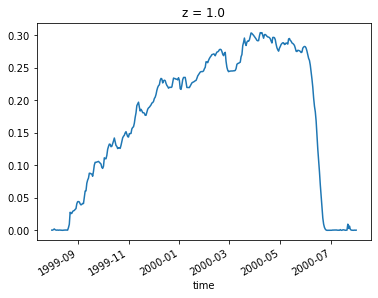

In [36]:
ts.plot()

A field can be plotted

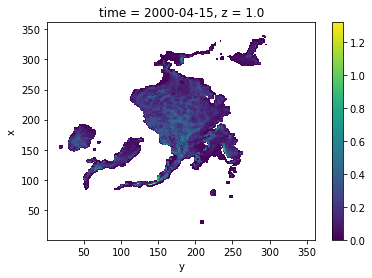

In [37]:
snod.sel(time='2000-04-15').plot()

In [39]:
import pandas as pd

trackfile = '../Data/icetracks.20040403.csv'

In [54]:
df = pd.read_csv(trackfile, header=0, parse_dates={'time': ['year', 'month', 'day']}, index_col='time', usecols=['lat', 'lon', 'year', 'month', 'day'])
df.head()

,lat,lon
time,,
2000-04-03,84.50810,10.619687
2000-03-27,84.69821,12.388343
2000-03-20,85.18298,12.508698
2000-03-13,85.49818,16.981724
2000-03-06,85.37117,22.402065


The snow depth data are on a grid in the NSIDC North Polar Stereo projection.  So the latitude and longitude coordinates need to be transformed to projected `(x,y)` coordinates.  `cartopy.crs.Projection` classes have a `transform_points` method that can do this easily.  The [NSIDC North Polar Stereographic Projection](https://nsidc.org/data/polar-stereo/ps_grids.html) is different from the standard `cartopy.crs.NorthPolarStereo` projection so a non-standard projection needs to be defined. 

In [55]:
import cartopy.crs as ccrs

In [67]:
HughsEllipsoid = ccrs.Globe(semimajor_axis=6378273., semiminor_axis=6356889.449)
NSIDC_NorthPolarStereo = ccrs.Stereographic(central_latitude=90., central_longitude=-45., true_scale_latitude=70., globe=HughsEllipsoid)

In [72]:
xyz = NSIDC_NorthPolarStereo.transform_points(ccrs.PlateCarree(), df.lon.values, df.lat.values)
x = xyz[:,0]
y = xyz[:,1]

In [73]:
import matplotlib.pyplot as plt

/home/apbarret/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


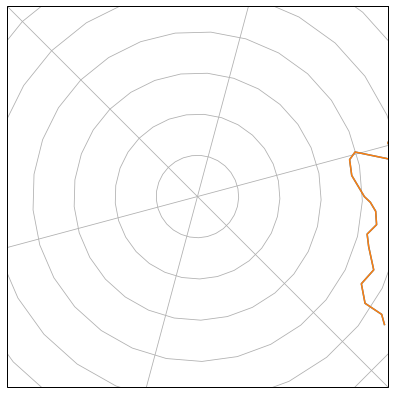

In [88]:
# This needs to be fixed
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection=NSIDC_NorthPolarStereo)
ax.set_extent([-500000, 500000, -500000, 500000], NSIDC_NorthPolarStereo)
ax.coastlines()
ax.gridlines()
ax.plot(x, y, transform=NSIDC_NorthPolarStereo)
ax.plot(df.lon.values, df.lat.values, transform=ccrs.PlateCarree())

The data are weekly and need to be interpolated to daily to extract the data.  __TBD__